# CSCI 5897 Homework 2
### Anya Lee

### **Problem 1**

The goal of this problem is to develop flexibility with your Forward Euler code, and to learn a bit about the effect of step size on the accuracy of the solution.
	
a. Using your Forward Euler method, simulate the solution to the *normalized* SIS model discussed in class (Week 3) using $\beta=3$ and $\gamma=2$, and with $(s_0, i_0) = (0.99, 0.01)$. Create three plots ranging from $t=0$ to $t=25$. On the first, simulate using a step size $\Delta t=2$. On the second, use $\Delta t =1$. On the third, use $\Delta t = \tfrac{1}{2}$. In each plot, show only your solution's $I(t)$ in a red solid line, labeled as "Forward Euler", and then also plot the analytical solution from class in a black dashed line, labeled as "Analytical." Please also set the y-axis range to $[0,0.5]$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Problem 1 (a): Forward Euler SIS model
def SIS_Euler(s0, i0, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max+stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    # SIS has no recovered compartment
    # note N = s0 + i0, should be 1 (normalized)
    
    for idx,t in enumerate(T):
        if idx == 0:
            S[idx] = s0
            I[idx] = i0
        else:
            # normalized SIS equations
            dS_dt = -beta * S[idx-1] * I[idx-1] + gamma * I[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] - gamma * I[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
    
    return S, I, T

# Function for closed form solution of SIS model found in Lecture 4 notes
def SIS_analytical(i0, beta, gamma, T):
    R_0 = beta / gamma    # basic reproduction number
    K = 1 - 1/R_0         # carrying capacity
    r = beta - gamma      # assumes r>0 by (growth) logistic equation

    # closed form solution for i(t)
    return K / (1 + ((K - i0) / i0) * np.exp(-r*np.array(T)))


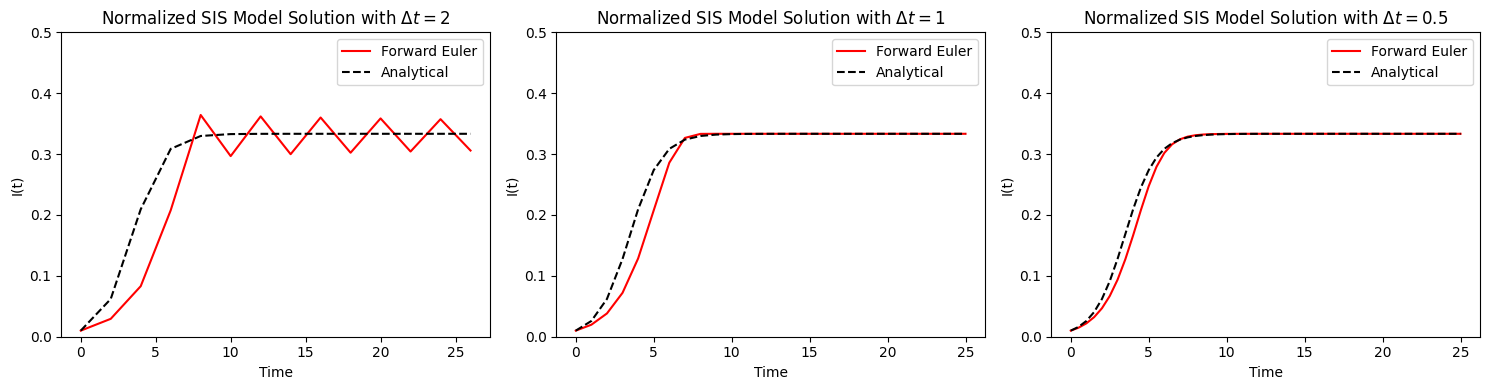

In [5]:
# Problem 1 (a): Three plots with different step sizes
beta, gamma = 3, 2
s0, i0 = 0.99, 0.01
t_max = 25
stepsizes = [2, 1, 0.5]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for ax, stepsize in zip(axs, stepsizes):
    S, I, T = SIS_Euler(s0, i0, beta, gamma, t_max, stepsize)
    I_exact = SIS_analytical(i0, beta, gamma, T)

    ax.plot(T, I, 'r-', label='Forward Euler')
    ax.plot(T, I_exact, 'k--', label='Analytical')

    ax.set_ylim(0, 0.5)
    ax.set_title("Normalized SIS Model Solution with " + r"$\Delta t =$" + f"{stepsize}")

    ax.set_xlabel("Time")
    ax.set_ylabel("I(t)")
    ax.legend()

plt.tight_layout()
plt.show()

b. Comment on what you see in your three plots. How does the step size affect our solution?

In the left plot with the largest step size of 2, the Forward Euler solution is unstable and inaccurate compared to the analytical closed form solution as seen by the jagged oscillation of the red line. The center plot with a slightly lower step size of 1 shows that the Forward Euler solution is a lot more stable compared to the step size of 2. It is very visible that this Forward Euler solution (red line) is more stable and converges to the closed form solution (black dashed line) after slightly overshooting it. However, both solutions still show some stiffness along the curve. Lastly, the right plot shows the solutions using the lowest step size of the three simulations at 0.5. The curve for Forward Euler and the analytical closed form solution are the smoothest, and it is easy to see that the Forward Euler solution (red line) follows the closed form solution (black dashed line) the closest and doesn't overshoot the black-dashed line like the first and second plot.

Overall, the decrease in time step size reduces the error in accuracy of the Forward Euler solution to the analytical closed form solution. It is also notable that as time step size decreases, both solutions become more stable and accurate. 

c. Define the maximum absolute error for a simulation using a particular $\Delta t$ as $$E(\Delta t) = \max_{t} \big | I_{\text{Euler}, \Delta t} (t) - I_\text{analytical}(t) \big |\ .$$ Write a function that runs the appropriate simulation, computes the analytical solution, and returns $E$ without plotting. Share a link to your code for this problem.

In [6]:
def max_abs_error(s0, i0, beta, gamma, t_max, stepsize):
    S, I_euler, T = SIS_Euler(s0, i0, beta, gamma, t_max, stepsize)
    I_analytical = SIS_analytical(i0, beta, gamma, T)
    E = np.max(np.abs(I_euler - I_analytical))
    return E

d. Create a plot on log-log axes showing $E(\Delta t)$ vs $\Delta t$ for values $$\Delta t \in \{2,1,\tfrac{1}{2},\tfrac{1}{4},\tfrac{1}{8},\tfrac{1}{16},\tfrac{1}{32}\}$$

Stepsize=2.0, E=0.12634
Stepsize=1.0, E=0.08077
Stepsize=0.5, E=0.04284
Stepsize=0.25, E=0.02200
Stepsize=0.125, E=0.01111
Stepsize=0.0625, E=0.00558
Stepsize=0.03125, E=0.00280


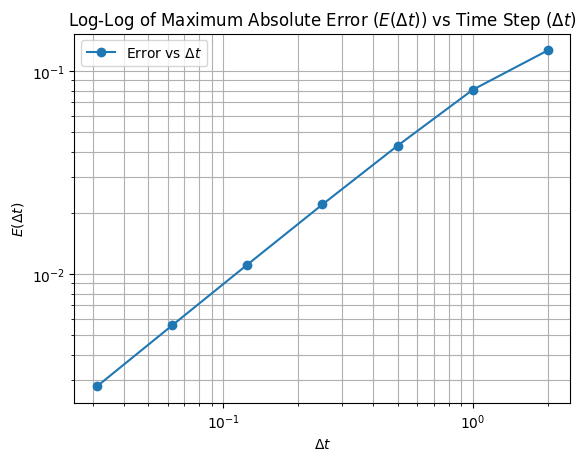

In [7]:
beta, gamma = 3, 2
s0, i0 = 0.99, 0.01
t_max = 25
stepsizes = np.array([2, 1, 1/2, 1/4, 1/8, 1/16, 1/32])

# Print error values for varying time step sizes
for stepsize in stepsizes:
    print(f"Stepsize={stepsize}, E={max_abs_error(s0, i0, beta, gamma, t_max, stepsize):.5f}")

# Plot
errors = [max_abs_error(s0, i0, beta, gamma, t_max, stepsize) for stepsize in stepsizes]

plt.loglog(stepsizes, errors, "o-", label="Error vs " + r"$\Delta t$")
plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$E(\Delta t)$")
plt.title("Log-Log of Maximum Absolute Error " + r"$\left(E(\Delta t)\right)$" + " vs Time Step " + r"$(\Delta t)$")
plt.legend()
plt.grid(True, which="both")
plt.show()

e. Comment on what you observe in this plot, and comment on cases when you would want a larger or smaller step size, and why? Imagining yourself in an advisory position in your community, can you think of any scenario where there is a connection between the step size of your simulation and the ethics of your advice?

This plot shows an overall positive linear trend, where a larger time step corresponds to a higher error. This is what was observed and stated in the previous parts. In general, a case you would want a smaller $\Delta t$ value is for higher accuracy and more computation, whereas you would want a large $\Delta t$ value for a faster result at the cost of unstable or even misleading results. 

A scenario that immediately comes to mind where there is a connection between step size of my simulation and ethics of my advice would be using the model to make informative decisions around public health and healthcare. If the step size is too large, results could lead to inaccurate results or predictions. For example, an underestimation of infection peaks would be detrimental in terms of understanding transmission dynamics and the severity of countermeasures that are needed. Ethically, we should aim for a numerically reliable result before providing advice or insights into an issue that is influential to policy and the population. 

### **Problem 2**

The goal of this problem is to get you thinking about the constraints on population contact structure and contact matrices, as well as sensitivity analyses.
	
a. As one who is interested in modeling disease transmission on college campuses, you hire two teams to measure contact patterns on a nearby campus. The first team, led by Dan Pemic, tells you that there are $200$ faculty and $1800$ students, with a contact matrix of 
	$$C_\text{Pemic} = \begin{pmatrix}
		3.1 & 43.5 \\
		4.7 & 25.0
	\end{pmatrix}$$

The second team, led by Flynn Uenza, tells you that there are $210$ faculty and $1750$ students, with a contact matrix of
	$$C_\text{Uenza} = \begin{pmatrix}
		3.0 & 44.5 \\
		4.8 & 25.1
		\end{pmatrix}
	$$
Whom do you trust more, Dan Pemic or Flynn Uenza? To answer this question, consider the self-consistency (or lack thereof) of each dataset. Explain your reasoning in words and include any calculations used to arrive at your conclusions. 

In [8]:
# contact patterns by Dan Pemic
C_Pemic = [
    [3.1, 43.5],
    [4.7, 25.0]
]

# Pemic group numbers
n_students = 1800
n_faculty = 200

# total cross-group contacts
faculty_to_students_Pemic = n_faculty * C_Pemic[0][1]  # first off-diagonal entry
students_to_faculty_Pemic = n_students * C_Pemic[1][0] # second off-diagonal entry 

# measure self-consistency
diff_Pemic = abs(faculty_to_students_Pemic - students_to_faculty_Pemic)
avg_total_Pemic = (faculty_to_students_Pemic + students_to_faculty_Pemic) / 2
rel_diff_Pemic = diff_Pemic / avg_total_Pemic * 100

# contact patterns by Flynn Uenza
C_Uenza = [
    [3.0, 44.5],
    [4.8, 25.1]
]
# Uenza group numbers
n_students = 1750
n_faculty = 210

# total cross-group contacts
faculty_to_students_Uenza = n_faculty * C_Uenza[0][1]  # first off-diagonal entry
students_to_faculty_Uenza = n_students * C_Uenza[1][0] # second off-diagonal entry

# measure self-consistency
diff_Uenza = abs(faculty_to_students_Uenza - students_to_faculty_Uenza)
avg_total_Uenza = (faculty_to_students_Uenza + students_to_faculty_Uenza) / 2
rel_diff_Uenza = diff_Uenza / avg_total_Uenza * 100

# print results
print("Pemic totals:")
print(f"Faculty-Students: {faculty_to_students_Pemic:.0f}")
print(f"Students-Faculty: {students_to_faculty_Pemic:.0f}")
print(f"Relative difference: {rel_diff_Pemic:.2f}%\n")

print("Uenza totals:")
print(f"Faculty-Students: {faculty_to_students_Uenza:.0f}")
print(f"Students-Faculty: {students_to_faculty_Uenza:.0f}")
print(f"Relative difference: {rel_diff_Uenza:.2f}%\n")

# who is more self-consistent?
if rel_diff_Pemic < rel_diff_Uenza:
    print("Dan Pemic's data are more self-consistent and thus more trustworthy.")
else:
    print("Flynn Uenza's data are more self-consistent and thus more trustworthy.")

Pemic totals:
Faculty-Students: 8700
Students-Faculty: 8460
Relative difference: 2.80%

Uenza totals:
Faculty-Students: 9345
Students-Faculty: 8400
Relative difference: 10.65%

Dan Pemic's data are more self-consistent and thus more trustworthy.


For this problem, it is assumed for both teams that the first row of the contact matrix represents faculty contact rates and the second row represents student contact rates. Note that the diagonal entries are within-group contact rates and the off-diagonal entries are between-group contact rates. 

In order to answer which dataset is more self-consistent, we need to calculate the total number of contacts from faculty to students and total number of contacts from students to faculty and compare their differences across the Pemic and Uenza teams. The dataset that has the smallest relative difference between the totals is more consistent. In this problem, I found that **Dan Pemic** is more trustworthy given the faculty-to-students contact total is 8700 and the students-to-faculty contact total is 8460. This results in a relative difference of 2.80%. In contrast, Uenza's faculty-to-students contact total is 9345 and the students-to-faculty contact total is 8400, which results in a relative difference of 10.65% which is much larger than the relative difference calculated using Pemic's dataset.

The calculations used to complete this problem are found above.

b. A straightforward fix to self-consistency issues is to "symmetrize" the rates. First, we compute the implied total number of intergroup contacts from faculty to students, and then compute the same from students to faculty. After averaging those two counts, divide by the appropriate population size to get per-person rates. Use this approach to symmetrize the two contact matrices. 

In [13]:
print("Pemic Symmetrized")
n_students = 1800
n_faculty = 200

print(f"New C_{0,1} entry: {avg_total_Pemic / n_faculty}")
print(f"New C_{1,0} entry: {avg_total_Pemic / n_students}")

print("Uenza Symmetrized")
n_students = 1750
n_faculty = 210

print(f"New C_{0,1} entry: {avg_total_Uenza / n_faculty}")
print(f"New C_{1,0} entry: {avg_total_Uenza / n_students}")

Pemic Symmetrized
New C_(0, 1) entry: 42.9
New C_(1, 0) entry: 4.766666666666667
Uenza Symmetrized
New C_(0, 1) entry: 42.25
New C_(1, 0) entry: 5.07


We obtain the symmetrized matrices:
$$C_\text{Pemic} = \begin{pmatrix}
		3.1 & 42.9 \\
		4.77 & 25.0
	\end{pmatrix}$$
	
$$C_\text{Uenza} = \begin{pmatrix}
		3.0 & 42.25 \\
		5.07 & 25.1
	\end{pmatrix}$$

c. How different are these two symmetrized matrices, really? Answer the question by computing the ratio of $R_0$ under Pemic's data to $R_0$ under Uenza's data, assuming SIR models with otherwise identical parameters.`

In [17]:
# Pemic symmetrized
C_Pemic = np.array([
    [3.1, 42.9],
    [4.77, 25.0]
])
eigenvalues_pemic = np.linalg.eigvals(C_Pemic)
# Print the results
print("Pemic Eigenvalues:", eigenvalues_pemic)
print("Max Eigenvalue:", max(eigenvalues_pemic))

# Uenza symmetrized
C_Uenza = np.array([
    [3.0, 42.25],
    [5.07, 25.1]
])
eigenvalues_uenza = np.linalg.eigvals(C_Uenza)
# Print the results
print("Uenza Eigenvalues:", eigenvalues_uenza)
print("Max Eigenvalue:", max(eigenvalues_uenza))

ratio = max(eigenvalues_pemic) / max(eigenvalues_uenza)
print("Ratio of R_0 (Pemic/Uenza):", ratio)

Pemic Eigenvalues: [-3.96486886 32.06486886]
Max Eigenvalue: 32.064868858806605
Uenza Eigenvalues: [-4.28875677 32.38875677]
Max Eigenvalue: 32.38875677356565
Ratio of R_0 (Pemic/Uenza): 0.9899999892856834


Because we are assuming SIR models with otherwise identical parameters, the next-generation matrix is proportional to the contact matrix $C$. Thus, $R_0$ for both Pemic and Uenza is equal to the largest eigenvalue of their corresponding contact matrix $C$.

Taking the ratio, we get
$$\frac{R_{0}^{Pemic}}{R_{0}^{Uenza}} = \frac{32.06486886}{32.38875677} = 0.9899999892856834$$

The ratio value we obtained is extremely close to 1 which means that Pemic's symmetrized matrix gives an $R_0$ about 0.9899 times Uenza's. This shows us that after symmetrization, the two contact matrices lead to very similar $R_0$ values and thus, are not very much different at all. 

### **Problem 3**

(Grad / EC): The goal of this problem is to get you to think about additional flavors of models that build on the SIR model backbone, and practice writing down flow diagrams and systems of differential equations. For each of the following situations please (i) draw a flow diagram with the SIR backbone in black, (ii) include any modifications in a second color, and (iii) write out your differential equations using the same color scheme. 

a. Suppose that we want to model the possibility that the natural history of infection means that a person is infected *but not infectious* before becoming infected-and-infectious. Let the typical  *latent* period---the time between exposure and infectiousness---last for $q$ days. Use the letter $E$ for this new compartment. Draw a flow diagram for the non-normalized system, and write a set of corresponding differential equations. 

# ![3a Flow Diagram and Differential Equations](/Users/anya/Documents/CSCI_5897_Comp_and_Math_of_Infectious_Diseases/Homeworks/HW2/hw2_3a.png)

b. Suppose that we want to model Hospitalization, with the following assumption: Infected folks either recover directly *or* they are hospitalized first and then recover. Let the direct recovery rate be $\gamma$, and suppose that there are 4 direct recoveries for every 1 hospitalization. Let the typical duration of a hospitalization be $\delta$ days. Use the letter $h$ for the hospitalized compartment. Draw a flow diagram for the normalized system, and write a set of corresponding differential equations. You should assume that folks in the hospital do not come into contact with anyone else during their hospital stay.

# ![3b Flow Diagram and Differential Equations](/Users/anya/Documents/CSCI_5897_Comp_and_Math_of_Infectious_Diseases/Homeworks/HW2/hw2_3b.png)

c. Suppose that we want to model an infectious disease that afflicts a growing population of bacteria, such that the infection follows an SIR model, the bacteria grow according to a logistic growth model with intrinsic growth rate $\alpha$ and carrying capacity $K$. Let all bacteria reproduce, but suppose that susceptible and recovered bacteria produce susceptible progeny, while infected bacteria produce infected progeny. The carrying capacity is shared by all three bacteria. 

# ![3c Flow Diagram and Differential Equations](/Users/anya/Documents/CSCI_5897_Comp_and_Math_of_Infectious_Diseases/Homeworks/HW2/hw2_3c.png)